In [5]:
library(dplyr)

In [28]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [29]:
col_Epen2 = '#c5b0d5'
col_P_Sert = '#8c564b'
col_U_Neur1 = '#ffbb78'
col_U_Neur2 = '#d62728'
col_U_Neur3 = '#c49c94'

In [64]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_fractions.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile)

donor_id,pool_id,time_point,celltype,f_cells
HPSI0114i-eipl_1,pool1,D11,FPP,0.53641322
HPSI0114i-eipl_1,pool1,D11,NB,0.07314726
HPSI0114i-eipl_1,pool1,D11,P_FPP,0.39043953
HPSI0114i-kolf_2,pool12,D11,FPP,0.61851852
HPSI0114i-kolf_2,pool12,D11,NB,0.02962963
HPSI0114i-kolf_2,pool12,D11,P_FPP,0.35185185


In [65]:
library(ggplot2)

In [66]:
myfile$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% myfile$celltype){
        myfile[myfile$celltype == ordering[i],'order'] <-  i
    }   
}

myfile = myfile[order(myfile$order),]
# myfile

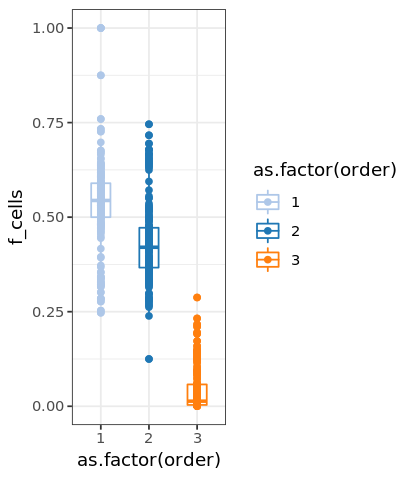

In [68]:
options(repr.plot.width=3.5, repr.plot.height=4)
# ggplot(myfile, aes(x = celltype, y = f_cells, colour = celltype)) + geom_point() + scale_color_manual(values = cols[1:3])
ggplot(myfile, aes(x = as.factor(order), y = f_cells, colour = as.factor(order))) + geom_boxplot(width = 0.4) + geom_point()+
        scale_color_manual(values = cols[unique(myfile$order)]) + theme_bw()

In [69]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_fractions.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,celltype,f_cells
HPSI0114i-bezi_3,pool10,D30,Astro,0.21527778
HPSI0114i-bezi_3,pool10,D30,CHem,0.03819444


In [70]:
df = myfile
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "Astro"] <- "FPP"
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur2"
myfile = df

In [71]:
myfile$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% myfile$celltype){
        myfile[myfile$celltype == ordering[i],'order'] <-  i
    }   
}

myfile = myfile[order(myfile$order),]
df = myfile

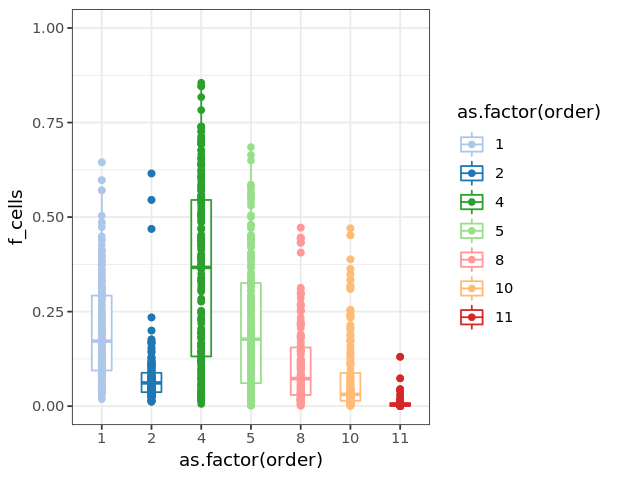

In [73]:
options(repr.plot.width=5.2, repr.plot.height=4)
ggplot(df, aes(x = as.factor(order), y = f_cells, colour = as.factor(order))) + geom_boxplot(width = 0.4) + geom_point() + ylim(c(0,1)) +
        scale_color_manual(values = cols[unique(myfile$order)]) + theme_bw() 

In [22]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5


In [24]:
df = myfile
df = df[df$treatment == 'NONE',]
df1 = df %>% group_by(donor_id) %>% summarise(tot_cells = sum(n_cells))
df2 = df %>% group_by(celltype, donor_id) %>% summarise(tot_cells = sum(n_cells))
df2 = df2[df2$celltype == 'DA',]
head(df1,2)
head(df2,2)

donor_id,tot_cells
HPSI0114i-bezi_3,218
HPSI0114i-eipl_1,13236


celltype,donor_id,tot_cells
DA,HPSI0114i-bezi_3,66
DA,HPSI0114i-eipl_1,189


In [27]:
df3 = inner_join(df1,df2, by = "donor_id", suffix = c(".all",".DA"))
df3$f_cells = df3$tot_cells.DA/df3$tot_cells.all
head(df3[order(df3$f_cells),],1)
tail(df3[order(df3$f_cells),],1)

donor_id,tot_cells.all,celltype,tot_cells.DA,f_cells
HPSI0115i-zihe_1,103,DA,1,0.009708738


donor_id,tot_cells.all,celltype,tot_cells.DA,f_cells
HPSI0513i-pedc_1,1,DA,1,1


In [80]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_fractions.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,treatment,celltype,f_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,0.009174312
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,0.022935780


In [81]:
df = myfile
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur3"
myfile = df

In [82]:
myfile$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% myfile$celltype){
        myfile[myfile$celltype == ordering[i],'order'] <-  i
    }   
}

myfile = myfile[order(myfile$order),]
df = myfile

In [83]:
df = df[df$treatment == 'ROT',]

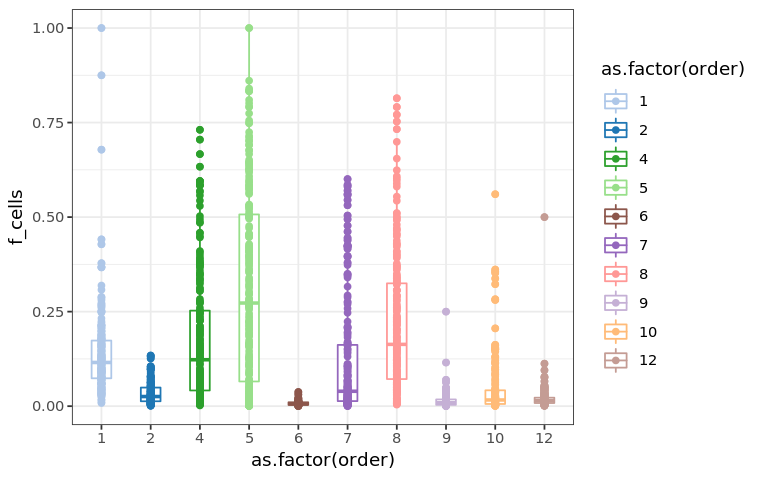

In [84]:
options(repr.plot.width=6.4, repr.plot.height=4)
ggplot(df, aes(x = as.factor(order), y = f_cells, colour = as.factor(order))) + geom_boxplot(width = 0.4) + geom_point() + ylim(c(0,1)) +
        scale_color_manual(values = cols[unique(myfile$order)]) + theme_bw() 

In [55]:
# df0 = df[df$celltype %in% c("DA","Sert","Astro","Epen1","U_Neur1"),]
# df0 = df[df$celltype %in% c("DA","Sert","Astro","Epen1","U_Neur1","FPP","P_FPP"),]
df0 = df[df$celltype %in% c("DA","Sert","Astro","Epen1","U_Neur1","FPP","P_FPP","P_Sert"),]

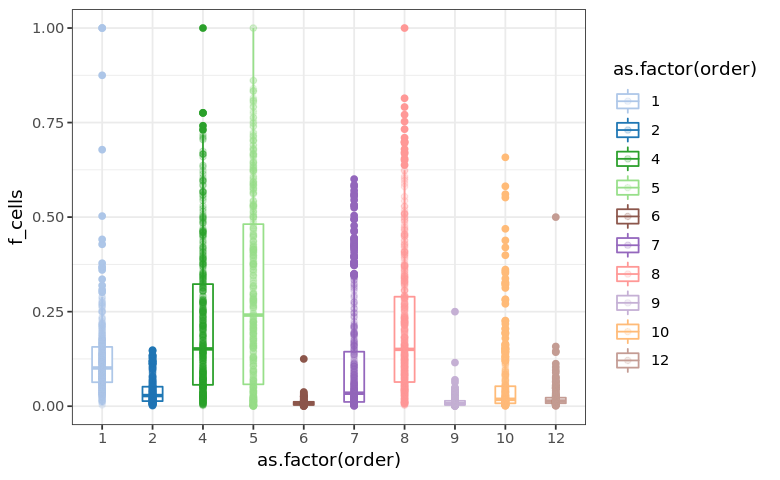

In [57]:
options(repr.plot.width=6.5, repr.plot.height=4)
ggplot(df0, aes(x = as.factor(order), y = f_cells, colour = as.factor(order)))+ geom_boxplot(width = 0.4) + 
        geom_point(alpha = 0.2) + scale_color_manual(values = cols[unique(df0$order)]) + theme_bw() 

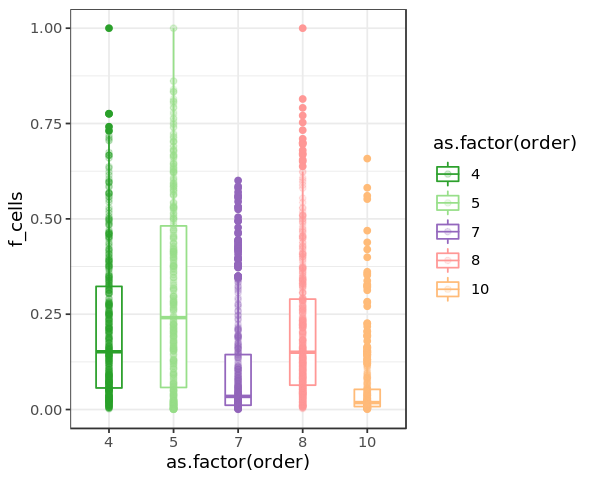

In [338]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(df0, aes(x = as.factor(order), y = f_cells, colour = as.factor(order)))+ geom_boxplot(width = 0.4) + 
        geom_point(alpha = 0.2) + scale_color_manual(values = cols[unique(df0$order)]) + theme_bw() 

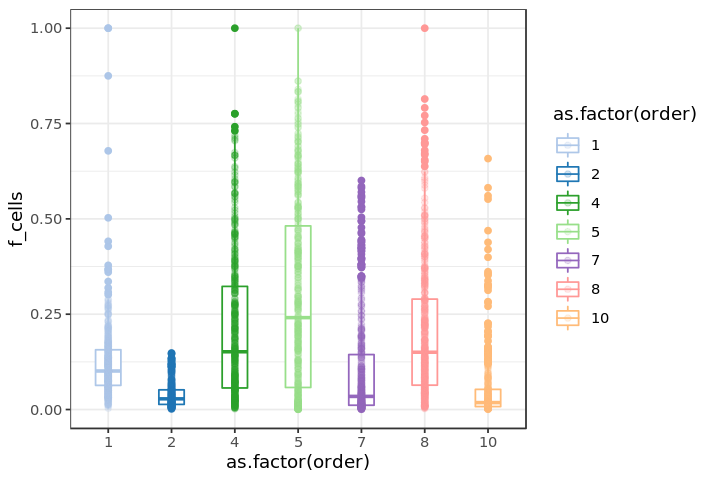

In [335]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(df0, aes(x = as.factor(order), y = f_cells, colour = as.factor(order)))+ geom_boxplot(width = 0.4) + 
        geom_point(alpha = 0.2) + scale_color_manual(values = cols[unique(df0$order)]) + theme_bw() 

In [70]:
## D52
df = myfile %>% group_by(celltype,time_point, treatment) %>% summarise(fcells = mean(f_cells))

In [71]:
df_NONE = df[df$treatment == 'NONE',]
df_NONE

celltype,time_point,treatment,fcells
<fct>,<fct>,<fct>,<dbl>
Astro,D52,NONE,0.094421625
CHem,D52,NONE,0.064271036
DA,D52,NONE,0.244989824
Epen1,D52,NONE,0.190056388
Epen2,D52,NONE,0.008776468
FPP,D52,NONE,0.110007601
P_FPP,D52,NONE,0.040009615
P_Sert,D52,NONE,0.009775141
Sert,D52,NONE,0.277320681


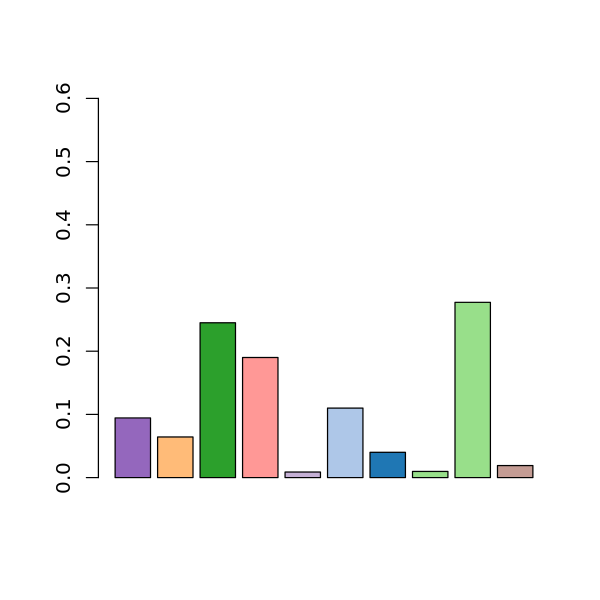

In [72]:
options(repr.plot.width=5, repr.plot.height=5)
barplot(df_NONE$fcells, col = c(col_Astro,col_U_Neur1,col_DA,col_Epen1,col_Epen2,
                                col_FPP, col_P_FPP, col_P_Sert, col_Sert,col_U_Neur3), ylim = c(0,0.6))

In [73]:
df_ROT = df[df$treatment == 'ROT',]
df_ROT

celltype,time_point,treatment,fcells
<fct>,<fct>,<fct>,<dbl>
Astro,D52,ROT,0.116936901
CHem,D52,ROT,0.047076649
DA,D52,ROT,0.174869590
Epen1,D52,ROT,0.216784158
Epen2,D52,ROT,0.014742127
FPP,D52,ROT,0.137625962
P_FPP,D52,ROT,0.034093150
P_Sert,D52,ROT,0.007485521
Sert,D52,ROT,0.312513590


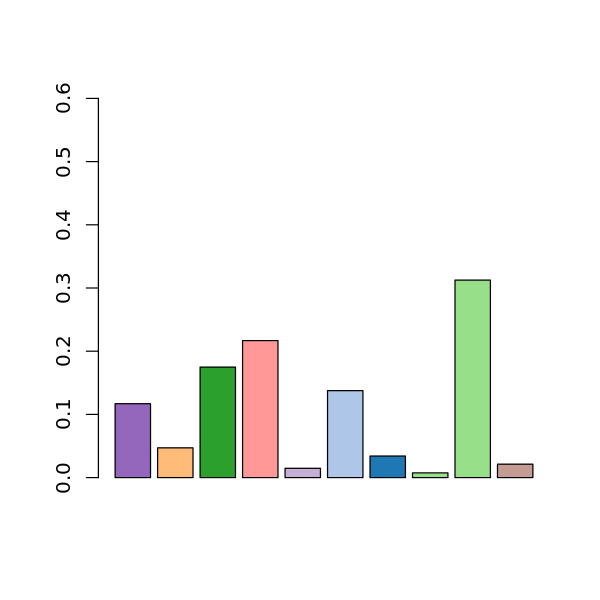

In [74]:
options(repr.plot.width=5, repr.plot.height=5)
barplot(df_ROT$fcells, col = c(col_Astro,col_U_Neur1,col_DA,col_Epen1,col_Epen2,
                                col_FPP, col_P_FPP, col_P_Sert, col_Sert,col_U_Neur3), ylim = c(0,0.6))

In [198]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,celltype,n_cells
<fct>,<fct>,<fct>,<fct>,<int>
HPSI0114i-eipl_1,pool1,D11,FPP,1672
HPSI0114i-eipl_1,pool1,D11,NB,228


In [199]:
## D11
df = myfile %>% group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
df$fractions = df$ncells/sum(df$ncells)
df
# sum(df$fractions)

celltype,time_point,ncells,fractions
<fct>,<fct>,<int>,<dbl>
FPP,D11,136074,0.5370332
NB,D11,9973,0.0393597
P_FPP,D11,107334,0.4236071


In [17]:
ordering = c("FPP","P_FPP","NB","DA","Sert","P_Sert","Astro","Epen1","Epen2","U_Neur1","U_Neur2","U_Neur3")
cols = c(col_FPP,col_P_FPP,col_NB,col_DA,col_Sert,col_P_Sert,col_Astro,col_Epen1,col_Epen2,col_U_Neur1,col_U_Neur2,col_U_Neur3)

In [239]:
df$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% df$celltype){
        df[df$celltype == ordering[i],'order'] <-  i
    }   
}

df = df[order(df$order),]
df

celltype,time_point,treatment,ncells,fractions,order
<chr>,<fct>,<fct>,<int>,<dbl>,<int>
FPP,D52,NONE,34515,0.113589990,1
P_FPP,D52,NONE,15390,0.050648992,2
DA,D52,NONE,54331,0.178805092,4
Sert,D52,NONE,74984,0.246774788,5
P_Sert,D52,NONE,1793,0.005900821,6
Astro,D52,NONE,44059,0.144999605,7
Epen1,D52,NONE,50084,0.164828076,8
Epen2,D52,NONE,1869,0.006150940,9
U_Neur1,D52,NONE,22674,0.074620873,10


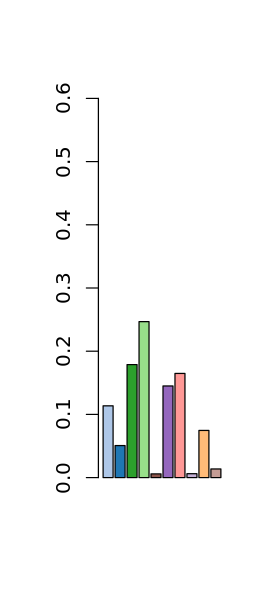

In [240]:
options(repr.plot.width=2.3, repr.plot.height=5)
barplot(df$fractions, col = cols[df$order], ylim = c(0,0.6))

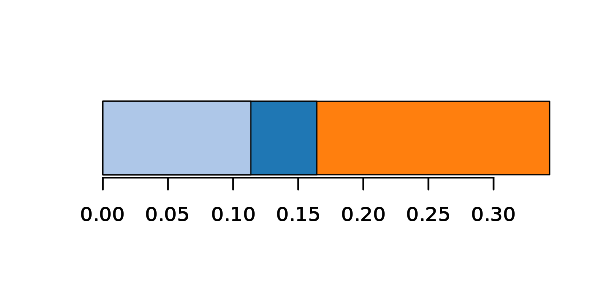

In [241]:
options(repr.plot.width=5, repr.plot.height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[3], horiz = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[2], add = T, horiz = T)
barplot(df$fractions[1], col = cols[1], add = T, horiz = T) 

In [255]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,celltype,n_cells
<fct>,<fct>,<fct>,<fct>,<int>
HPSI0114i-bezi_3,pool10,D30,Astro,62
HPSI0114i-bezi_3,pool10,D30,CHem,11


In [256]:
## D30
df = myfile %>% group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
df$fractions = df$ncells/sum(df$ncells)
df
# sum(df$fractions)

celltype,time_point,ncells,fractions
<fct>,<fct>,<int>,<dbl>
Astro,D30,58109,0.231581003
CHem,D30,21268,0.084759070
DA,D30,69007,0.275012653
Epen1,D30,28145,0.112165884
P_FPP,D30,18988,0.075672617
Sert,D30,53774,0.214304787
unknown,D30,1632,0.006503987


In [257]:
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "Astro"] <- "FPP"
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur2"

In [258]:
df$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% df$celltype){
        df[df$celltype == ordering[i],'order'] <-  i
    }   
}

df = df[order(df$order),]
df

celltype,time_point,ncells,fractions,order
<chr>,<fct>,<int>,<dbl>,<int>
FPP,D30,58109,0.231581003,1
P_FPP,D30,18988,0.075672617,2
DA,D30,69007,0.275012653,4
Sert,D30,53774,0.214304787,5
Epen1,D30,28145,0.112165884,8
U_Neur1,D30,21268,0.084759070,10
U_Neur2,D30,1632,0.006503987,11


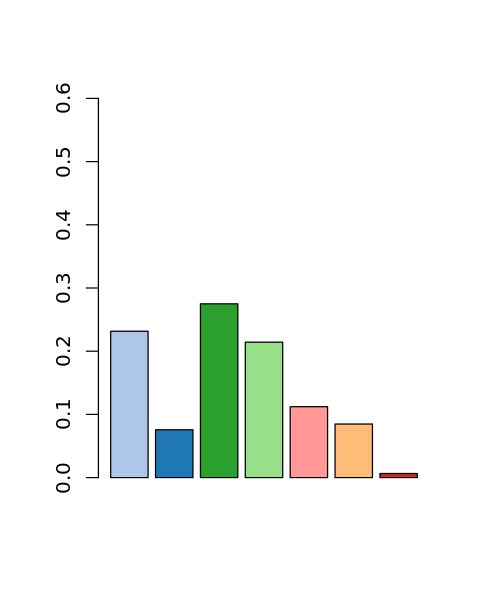

In [259]:
options(repr.plot.width=4, repr.plot.height=5)
barplot(df$fractions, col = cols[df$order], ylim = c(0,0.6))

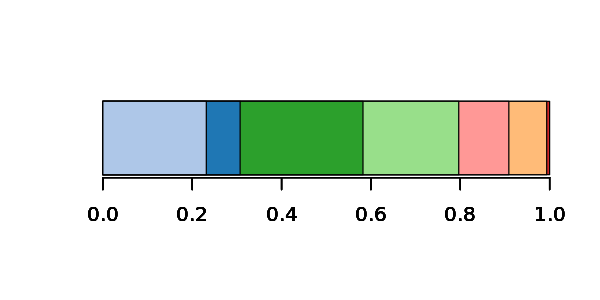

In [260]:
options(repr.plot.width=5, repr.plot.height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 

In [3]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5


In [8]:
# library(dplyr)

In [9]:
df = myfile[myfile$pool_id == 'pool4',]
# df = myfile
df0 = df %>% group_by(donor_id,treatment)  %>% summarise(ncells = sum(n_cells))
# df0 = df %>% group_by(donor_id)  %>% summarise(ncells = sum(n_cells))
df0

donor_id,treatment,ncells
HPSI0115i-aion_2,NONE,558
HPSI0115i-aion_2,ROT,601
HPSI0115i-bimq_4,NONE,998
HPSI0115i-bimq_4,ROT,1136
HPSI0115i-boqx_2,NONE,140
HPSI0115i-boqx_2,ROT,123
HPSI0115i-gifk_1,NONE,175
HPSI0115i-gifk_1,ROT,211
HPSI0214i-feec_2,NONE,874
HPSI0214i-feec_2,ROT,896


In [10]:
write.table(df0, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/d52_cells_per_line.tsv", row.names = F, col.names = T, quote = F, sep = "\t")

In [11]:
## D52
df = myfile %>% group_by(celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
df
# sum(df$fractions)

celltype,time_point,treatment,ncells
Astro,D52,NONE,44059
Astro,D52,ROT,41392
CHem,D52,NONE,22674
CHem,D52,ROT,8694
DA,D52,NONE,54331
DA,D52,ROT,25470
Epen1,D52,NONE,50084
Epen1,D52,ROT,42063
Epen2,D52,NONE,1869
Epen2,D52,ROT,1577


In [51]:
mat = matrix(0, nrow=2,ncol=2)
mat[1,1] = df[df$treatment == 'NONE' & df$celltype == 'DA',]$ncells
mat[1,2] = df[df$treatment == 'ROT' & df$celltype == 'DA',]$ncells
mat[2,1] = sum(df[df$treatment == 'NONE' & df$celltype != 'DA',]$ncells)
mat[2,2] = sum(df[df$treatment == 'ROT' & df$celltype != 'DA',]$ncells)
mat

54331,25470
249525,193768


In [52]:
fisher.test(mat)


	Fisher's Exact Test for Count Data

data:  mat
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.630161 1.683333
sample estimates:
odds ratio 
  1.656472 


In [53]:
mat = matrix(0, nrow=2,ncol=2)
mat[1,1] = 100
mat[1,2] = 20
mat[2,1] = 1000
mat[2,2] = 200
mat

100,20
1000,200


In [54]:
fisher.test(mat)


	Fisher's Exact Test for Count Data

data:  mat
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5972418 1.7482994
sample estimates:
odds ratio 
         1 


In [250]:
df_NONE = df[df$treatment == 'NONE',]
df_NONE$fractions = df_NONE$ncells/sum(df_NONE$ncells)
df_NONE

celltype,time_point,treatment,ncells,fractions
<fct>,<fct>,<fct>,<int>,<dbl>
Astro,D52,NONE,44059,0.144999605
CHem,D52,NONE,22674,0.074620873
DA,D52,NONE,54331,0.178805092
Epen1,D52,NONE,50084,0.164828076
Epen2,D52,NONE,1869,0.006150940
FPP,D52,NONE,34515,0.113589990
P_FPP,D52,NONE,15390,0.050648992
P_Sert,D52,NONE,1793,0.005900821
Sert,D52,NONE,74984,0.246774788


In [251]:
df = df_NONE
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur3"

df$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% df$celltype){
        df[df$celltype == ordering[i],'order'] <-  i
    }   
}

df = df[order(df$order),]
df

celltype,time_point,treatment,ncells,fractions,order
<chr>,<fct>,<fct>,<int>,<dbl>,<int>
FPP,D52,NONE,34515,0.113589990,1
P_FPP,D52,NONE,15390,0.050648992,2
DA,D52,NONE,54331,0.178805092,4
Sert,D52,NONE,74984,0.246774788,5
P_Sert,D52,NONE,1793,0.005900821,6
Astro,D52,NONE,44059,0.144999605,7
Epen1,D52,NONE,50084,0.164828076,8
Epen2,D52,NONE,1869,0.006150940,9
U_Neur1,D52,NONE,22674,0.074620873,10


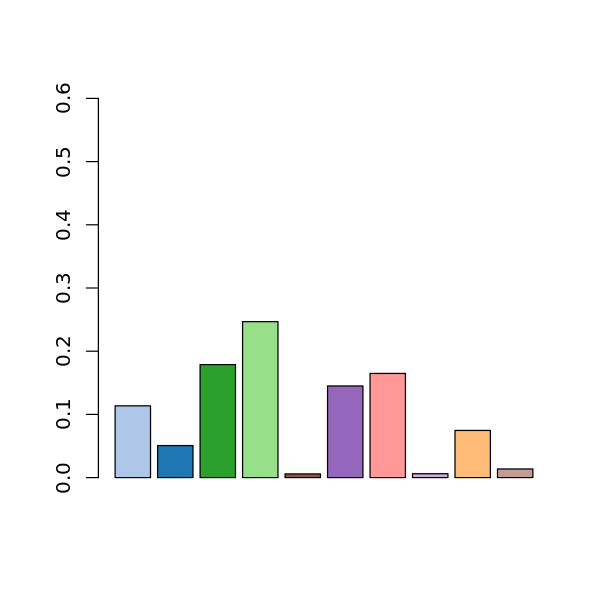

In [252]:
options(repr.plot.width=5, repr.plot.height=5)
barplot(df$fractions, col = cols[df$order], ylim = c(0,0.6))

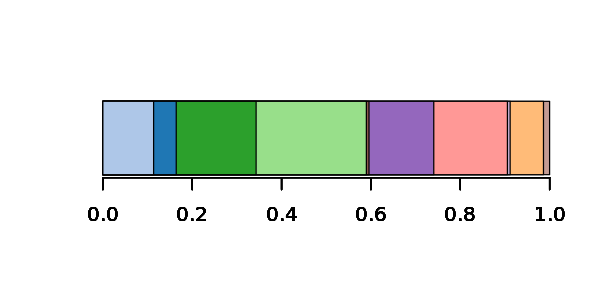

In [253]:
options(repr.plot.width=5, repr.plot.height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9]+df$fractions[10], col = cols[df$order[10]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9], col = cols[df$order[9]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8], col = cols[df$order[8]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 

In [2]:
65718/514400
25131/514400

[1] 0.1277566

[1] 0.04885498

In [262]:
## D52
df = myfile %>% group_by(celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
df

celltype,time_point,treatment,ncells
<fct>,<fct>,<fct>,<int>
Astro,D52,NONE,44059
Astro,D52,ROT,41392
CHem,D52,NONE,22674
CHem,D52,ROT,8694
DA,D52,NONE,54331
DA,D52,ROT,25470
Epen1,D52,NONE,50084
Epen1,D52,ROT,42063
Epen2,D52,NONE,1869


In [263]:
df_ROT = df[df$treatment == 'ROT',]
df_ROT$fractions = df_ROT$ncells/sum(df_ROT$ncells)
df_ROT

celltype,time_point,treatment,ncells,fractions
<fct>,<fct>,<fct>,<int>,<dbl>
Astro,D52,ROT,41392,0.188799387
CHem,D52,ROT,8694,0.039655534
DA,D52,ROT,25470,0.116175116
Epen1,D52,ROT,42063,0.191859988
Epen2,D52,ROT,1577,0.007193096
FPP,D52,ROT,31203,0.142324779
P_FPP,D52,ROT,9741,0.044431166
P_Sert,D52,ROT,780,0.003557777
Sert,D52,ROT,55225,0.251895201


In [264]:
df = df_ROT
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur3"

df$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% df$celltype){
        df[df$celltype == ordering[i],'order'] <-  i
    }   
}

df = df[order(df$order),]
df

celltype,time_point,treatment,ncells,fractions,order
<chr>,<fct>,<fct>,<int>,<dbl>,<int>
FPP,D52,ROT,31203,0.142324779,1
P_FPP,D52,ROT,9741,0.044431166,2
DA,D52,ROT,25470,0.116175116,4
Sert,D52,ROT,55225,0.251895201,5
P_Sert,D52,ROT,780,0.003557777,6
Astro,D52,ROT,41392,0.188799387,7
Epen1,D52,ROT,42063,0.191859988,8
Epen2,D52,ROT,1577,0.007193096,9
U_Neur1,D52,ROT,8694,0.039655534,10


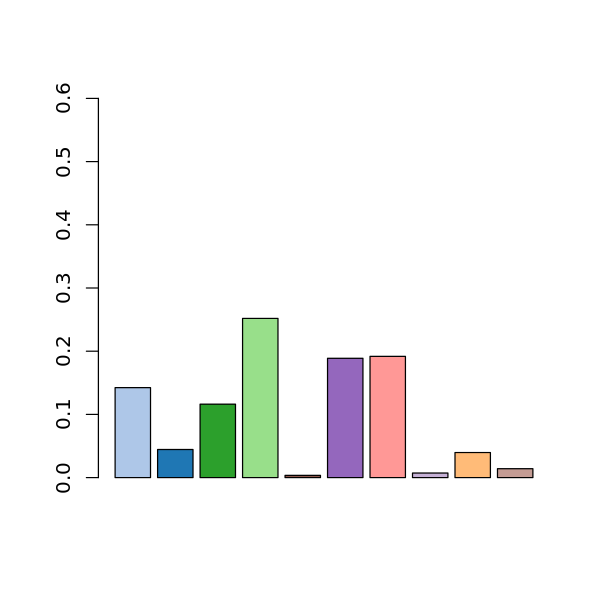

In [267]:
options(repr.plot.width=5, repr.plot.height=5)
barplot(df$fractions, col = cols[df$order], ylim = c(0,0.6))

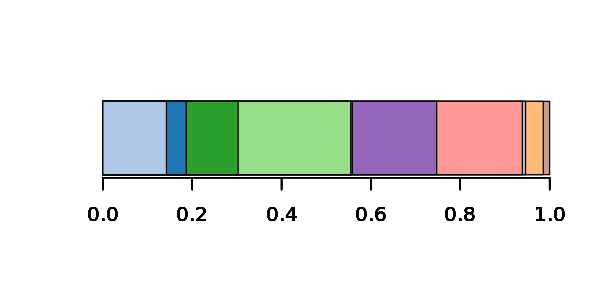

In [268]:
options(repr.plot.width=5, repr.plot.height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9]+df$fractions[10], col = cols[df$order[10]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9], col = cols[df$order[9]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8], col = cols[df$order[8]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 